In [4]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.fcn8s_model import Fcn8sModel
from trainers.road_cache_trainer import RoadCacheTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/fcn8s_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: default
batch_size: 2
checkpoint_dir: ./experiments\fcn8s_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: fcn8s_kittiroad
image_size:
- 320
- 480
- 3
learning_rate: 0.00023949513325777832
loss: bce_dice_loss
max_to_keep: 5
num_epochs: 2
num_iter_per_epoch: 100
summary_dir: ./experiments\fcn8s_kittiroad\summary/



In [5]:
path = "./pretrained/vgg16.npy"

In [6]:
sess = tf.Session()

In [7]:
model = Fcn8sModel(config)
model.build(path)

npy file loaded
dict_keys(['conv5_1', 'fc6', 'conv5_3', 'conv5_2', 'fc8', 'fc7', 'conv4_1', 'conv4_2', 'conv4_3', 'conv3_3', 'conv3_2', 'conv3_1', 'conv1_1', 'conv1_2', 'conv2_2', 'conv2_1'])
Model built successfully.


In [1]:
# print('trainable variables')
# for v in tf.trainable_variables():
#     print(v.name, v.get_shape().as_list(),v.trainable)

In [3]:
# print('trainable variables')
# for v in model.train_vars:
#     print(v.name, v.get_shape().as_list(),v.trainable)

Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (2312, 320, 480, 3)
Size of masks collection :  (2312, 320, 480)


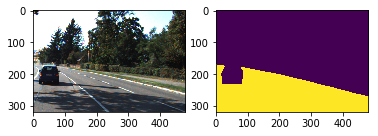

In [8]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("test_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [9]:
logger = Logger(sess,config)
trainer = RoadCacheTrainer(sess,model,data,config,logger)
trainer.train()

Train with cache layer


100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [03:32<00:00,  1.06s/it]


Export successfuly cache features
200


In [13]:
import numpy as np
np.array(trainer.X_hidden).shape

(200, 1, 10, 15, 512)

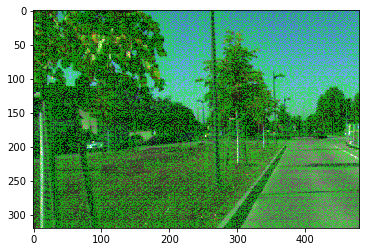

Accuracy :  0.003125


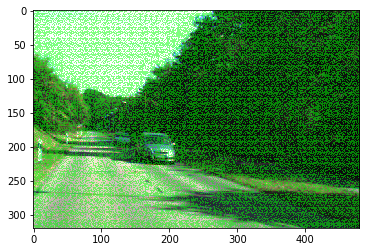

Accuracy :  0.00625


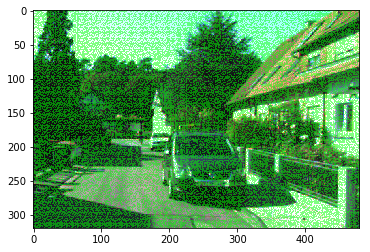

Accuracy :  0.0


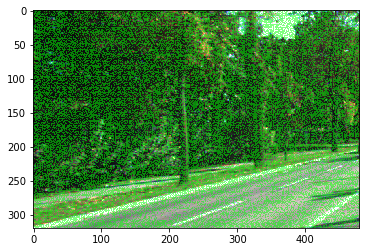

Accuracy :  0.0


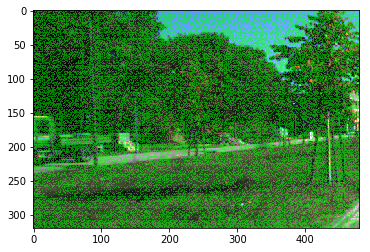

Accuracy :  0.0


In [9]:
test = [data.get_data_element("test_data",i) for i in range(5)]
model.load(sess)

for item in test :
    img = item[0]
    mask = item[1]
    model.predict(sess,img,mask)

In [10]:
sess.close()